## Computational Learing Theory: Boosting

In [10]:
%matplotlib inline
from math import pi,exp,sqrt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import random
import sys
import re

### Data Generation

In [95]:

def generate_2d_data(n=100, mu = [0,0], cov = np.identity(2), label=0):
    s = np.random.multivariate_normal(mu, cov, n)
    label_arr = []
    i=0
    while i<n:
        label_arr.append(label)
        i = i+1
    label_arr = np.asarray(label_arr).reshape(-1,1)
    x = np.concatenate((s,label_arr),axis=1)
    return pd.DataFrame(x)



## Decision Stump (Weak Learner)

In [300]:



def decision_stump(data,weighted = False,weights={'0':1,'1':1},debug=False):
    all_columns = list(data)
    last_column = all_columns[-1]
    features = all_columns[:-1]
    
    min_feature = 0
    min_error = sys.maxsize
    min_value = sys.maxsize
    lt = True #less than assigned to 0
    for item in features:
        for index, row in data.iterrows():
            pr_labels = check_feature(item, row[item], data, debug)
            if weighted:
                error_rate_0 = get_weighted_errors(data[last_column].values, pr_labels[0][0],weights)
            else:
                error_rate_0 = get_error_percent(data[last_column].values, pr_labels[0][0])/100
            #error_rate_0 = pr_labels[0][1]/len(pr_labels[0][0])
            if error_rate_0 <= min_error:
                min_error = error_rate_0
                min_feature = item
                min_value = row[item]
                lt = True
            if weighted:
                error_rate_1 = get_weighted_errors(data[last_column].values, pr_labels[1][0],weights)
            else:
                error_rate_1 = get_error_percent(data[last_column].values, pr_labels[1][0])/100
            #error_rate_1 = pr_labels[1][1]/len(pr_labels[1][0])
            if error_rate_1 <= min_error:
                min_error = error_rate_1
                min_feature = item
                min_value = row[item]
                lt = False
        if debug:
            print('Feature',item,'min_error',min_error,'min_feature',min_feature)
    return (min_error,min_feature,min_value,lt)

def get_error_percent(actual_labels,predicted_labels,debug=False):  
    error_points = 0
    for i,item in enumerate(actual_labels):
        if str(int(actual_labels[i])) != str(int(predicted_labels[i])):
            error_points = error_points + 1
    error_percent = (error_points/len(actual_labels))*100
    if debug:
        print("Error :",error_percent,"%")
    return error_percent

def get_weighted_errors(actual_labels,predicted_labels,weights={'0':1,'1':1},debug=False):
    error_points = 0
    for i,item in enumerate(actual_labels):
        if str(int(actual_labels[i])) != str(int(predicted_labels[i])):
            error_points = error_points + weights[str(int(actual_labels[i]))]
    if debug:
        print("Weights:",weights,"\nWeighted Errors :",error_points)
    return error_points

def check_feature(feature,value,data, debug=False):
    predicted_labels = []
    predicted_labels_errors = 0
    predicted_labels_reverse = []
    predicted_labels_reverse_errors = 0
    for index, row in data.iterrows():
        if (int(row[feature]) <= int(value)):
            predicted_labels_reverse.append(1)
            predicted_labels.append(0)
        else:
            predicted_labels_reverse.append(0)
            predicted_labels.append(1)
        if str(int(predicted_labels[-1])) != str(int(row[list(data)[-1]])):
            predicted_labels_errors = predicted_labels_errors + 1
            if debug:
                pass
                #print(row[feature],value)
                #print(predicted_labels[-1],row[list(data)[-1]])
        if str(predicted_labels_reverse[-1]) != str(row[list(data)[-1]]):
            predicted_labels_reverse_errors = predicted_labels_reverse_errors + 1
            if debug:
                pass
                #print(row[feature],value)
                #print(predicted_labels_reverse[-1],row[list(data)[-1]])
    ret = (predicted_labels,predicted_labels_errors),(predicted_labels_reverse,predicted_labels_reverse_errors)
    return ret

def calculate_decision(data,weighted = False, weights={'0':1,'1':1}, debug=False):
    decision_local = decision_stump(data, weighted ,weights , debug)
    if weighted:
        print("ERROR: ",decision_local[0]," points","\nFEATURE: ",decision_local[1])
    else:
        print("ERROR: ",decision_local[0]*100,"%","\nFEATURE: ",decision_local[1])
    print("VALUE: ",decision_local[2],"\nLESS THAN LABELLED 0: ",decision_local[3])
    return decision_local


### Generating New Data and calculating optimal decisions stump

In [332]:
## Generating Random Data

def generate_2d_data(n=100, mu = [0,0], cov = np.identity(2), label=0):
    s = np.random.multivariate_normal(mu, cov, n)
    label_arr = []
    i=0
    while i<n:
        label_arr.append(label)
        i = i+1
    label_arr = np.asarray(label_arr).reshape(-1,1)
    x = np.concatenate((s,label_arr),axis=1)
    return pd.DataFrame(x)
class1 = generate_2d_data(n=50,label=0)
class2 = generate_2d_data(n=50,mu=[2,0],label=1)
data = pd.DataFrame(np.concatenate((class1,class2),axis=0))
data = data.sample(frac=1) #Shuffling rows
print("DATA-SHAPE: ",data.shape)


decision = calculate_decision(data,debug=True)
decision_weighted = calculate_decision(data, True,{'0':1,'1':3},True)
decision,decision_weighted


## OPTDIGITSUBSET DATASET
data = []
with open("optdigitsubset.txt", "r") as ins:
    for i,line in enumerate(ins):
        line2 = re.sub(r'\s+', ',', line) 
        l = line2.split(",")
        l[-1] = l[-1].strip("\n")
        l = l[:-1]
        
        if (i < 554):
            l.append(0)
        else:
            l.append(1)
        # to_image(l)
        if len(l)==64:
            l.append(l[-1])
        data.append(l)
        
data = np.array(data)
df2 = pd.DataFrame(data)
train1 = df2.iloc[:50]
train2 = df2.iloc[554:604]
train_data = pd.concat([train1,train2])
train_data = train_data.sample(frac=1)


test1 = df2.iloc[51:554]
test2 = df2.iloc[604:]
test_data = pd.concat([test1,test2])
test_data = test_data.sample(frac=1)

opt_decision = calculate_decision(train_data,debug = True)

predicted_labels = []
actual_labels = test_data[list(test_data)[-1]]
for index, row in test_data.iterrows():
    if int(row[opt_decision[1]]) <= int(opt_decision[2]):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)

print("Size of Test Data Set:",len(test_data),"datapoints")

get_error_percent(actual_labels.values,predicted_labels)


DATA-SHAPE:  (100, 3)
Feature 0 min_error 0.1 min_feature 0
Feature 1 min_error 0.1 min_feature 0
ERROR:  10.0 % 
FEATURE:  0
VALUE:  0.1747051272298752 
LESS THAN LABELLED 0:  True
Feature 0 min_error 14 min_feature 0
Feature 1 min_error 14 min_feature 0
ERROR:  14  points 
FEATURE:  0
VALUE:  0.1747051272298752 
LESS THAN LABELLED 0:  True


((0.1, 0, 0.1747051272298752, True), (14, 0, 0.1747051272298752, True))

### Plotting data and stump

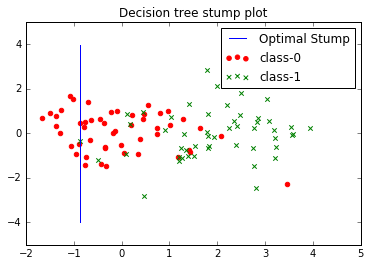

In [316]:
def plot_data_stump(data,decision,title="Decision tree stump plot"):
    #Splitting rows based on labels
    a = data.loc[data[list(data)[-1]]==0]
    b = data.loc[data[list(data)[-1]]==1]

    #Scatterplot of the split rows
    plt.scatter(a[0],a[1],marker="o",color="red",label="class-0")
    plt.scatter(b[0],b[1],marker="x",color="green",label="class-1")
    plt.title(title)
    # plt.plot(np.ones((100,1))*1.2, np.random.uniform(-4,4,100))
    if decision[1] == 0:
        plt.plot(np.ones((100,1))*decision[2], np.random.uniform(-4,4,100),color="blue",label="Optimal Stump")
    else:
        plt.plot(np.random.uniform(-5,5,100),np.ones((100,1))*decision[2],color="orange",label="Optimal Stump")
    plt.legend()
plot_data_stump(data,decision_weighted)

#### Trying to scale a feature

ERROR:  12.0 % 
FEATURE:  0
VALUE:  9.158977898458328 
LESS THAN LABELLED 0:  True
(0.12, 0, 9.158977898458328, True)


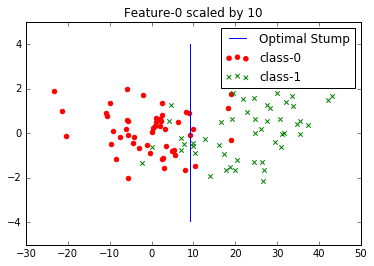

In [324]:
data2 = data.copy()
data2[0] = data2[0]*10
decision2 = calculate_decision(data2)
print(decision2)
plot_data_stump(data2,decision2,"Feature-0 scaled by 10")

### OPTDIGIT dataset

In [366]:
def to_image(feature_vector, remove_class=False, shape = (8,8)):
        if remove_class:
            feature_vector2 = feature_vector[:-1]
        else:
            feature_vector2 = feature_vector
        tempbig = []
        temp = []
        i = 0
        j = 0
        for item in feature_vector:
            temp.append(item)
            i = i+1
            if i%shape[1]==0:
                tempbig.append(temp)
                temp = []
                j = j+1
                if j%shape[0]==0:
                    break
        tempbig = np.asarray(tempbig,dtype="int")
        print(tempbig)
        plt.imshow(tempbig,cmap="gray")
    
data = []
with open("optdigitsubset.txt", "r") as ins:
    for i,line in enumerate(ins):
        line2 = re.sub(r'\s+', ',', line) 
        l = line2.split(",")
        l[-1] = l[-1].strip("\n")
        l = l[:-1]
        
        if (i < 554):
            l.append(0)
        else:
            l.append(1)
        # to_image(l)
        if len(l)==64:
            l.append(l[-1])
        data.append(l)
        
data = np.array(data)

In [100]:
data.shape

(1125, 65)

### Preparing Train/Test split

In [367]:
df2 = pd.DataFrame(data)
train1 = df2.iloc[:50]
train2 = df2.iloc[554:604]
train_data = pd.concat([train1,train2])
train_data = train_data.sample(frac=1)


test1 = df2.iloc[51:554]
test2 = df2.iloc[604:]
test_data = pd.concat([test1,test2])
test_data = test_data.sample(frac=1)

In [123]:
opt_decision = calculate_decision(train_data,debug = True)

Feature 0 min_error 2 min_feature 0
Feature 1 min_error 0.5 min_feature 0
Feature 2 min_error 0.47 min_feature 1
Feature 3 min_error 0.2 min_feature 2
Feature 4 min_error 0.2 min_feature 2
Feature 5 min_error 0.2 min_feature 2
Feature 6 min_error 0.2 min_feature 2
Feature 7 min_error 0.2 min_feature 2
Feature 8 min_error 0.2 min_feature 2
Feature 9 min_error 0.2 min_feature 2
Feature 10 min_error 0.2 min_feature 2
Feature 11 min_error 0.11 min_feature 10
Feature 12 min_error 0.11 min_feature 10
Feature 13 min_error 0.11 min_feature 10
Feature 14 min_error 0.11 min_feature 10
Feature 15 min_error 0.11 min_feature 10
Feature 16 min_error 0.11 min_feature 10
Feature 17 min_error 0.11 min_feature 10
Feature 18 min_error 0.11 min_feature 10
Feature 19 min_error 0.11 min_feature 10
Feature 20 min_error 0.08 min_feature 19
Feature 21 min_error 0.04 min_feature 20
Feature 22 min_error 0.04 min_feature 20
Feature 23 min_error 0.04 min_feature 20
Feature 24 min_error 0.04 min_feature 20
Feature 

#### For feature 36 with values <= 0, set label as 0
Trying this out on the test set

In [148]:
predicted_labels = []
actual_labels = test_data[list(test_data)[-1]]
for index, row in test_data.iterrows():
    if int(row[opt_decision[1]]) <= int(opt_decision[2]):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)

print("Size of Test Data Set:",len(test_data),"datapoints")

get_error_percent(actual_labels.values,predicted_labels)

Size of Test Data Set: 1024 datapoints
Error : 1.7578125 %


1.7578125

[[  0   0  32 208 208  32   0   0]
 [  0   0 144 255  96 208   0   0]
 [  0  16 224  16   0 144  64   0]
 [  0  64 144   0   0  96 112   0]
 [  0 128 128   0   0  64 128   0]
 [  0  64 144   0   0  64 128   0]
 [  0   0 240 128  64 192 112   0]
 [  0   0  32 160 255 240  32   0]]


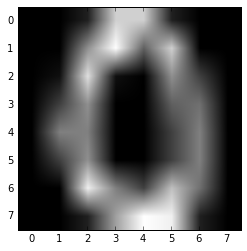

In [176]:
z = data[200]

to_image(z,remove_class=True)

### Ada Boost Algorithm

In [317]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_hastie_10_2

/Users/dhruv/virtualenvironment3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [364]:
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print('Error rate: Training: %.4f - Test: %.4f' % err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['red', 'darkblue'], grid = False)
    plot1.set_xlabel('Iterations', fontsize = 12)
    #plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'green', ls = 'dashed')

    
# Read data

all_columns = list(df2)
last_column = all_columns[-1]
features = all_columns[:-1]

# x, y = make_hastie_10_2()
# df = pd.DataFrame(x)
# df['Y'] = y
df = df2[features]
df['Y'] = df2[last_column]
df.astype('int')


# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)

X_train, Y_train = train.ix[:,:-1], train.ix[:,-1]
X_test, Y_test = test.ix[:,:-1], test.ix[:,-1]
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(1, 20, 1)
for i in x_range:    
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])

# Compare error vs iterations
print(er_train,er_test)
plot_error_rate(er_train, er_test)

In [368]:
# Read data

all_columns = list(df2)
last_column = all_columns[-1]
features = all_columns[:-1]

# x, y = make_hastie_10_2()
# df = pd.DataFrame(x)
# df['Y'] = y
df = df2[features]
df['Y'] = df2[last_column]
df.astype('int')


# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)

X_train, Y_train = train.ix[:,:-1], train.ix[:,-1]
X_test, Y_test = test.ix[:,:-1], test.ix[:,-1]

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(1, 20, 1)
for i in x_range:    
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])

# Compare error vs iterations
print(er_train,er_test)
plot_error_rate(er_train, er_test)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

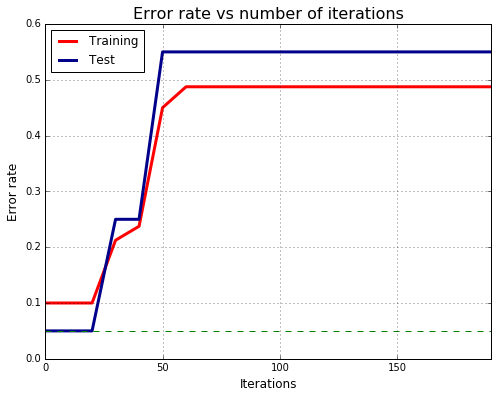

In [363]:
plot_error_rate(er_train, er_test)

[0.01154007 0.01137282 0.01123345 0.01114983 0.0110662  0.0110662
 0.0110662  0.01112195 0.01109408 0.01103833 0.01109408 0.01109408
 0.01114983 0.01114983 0.01114983 0.0111777  0.0111777  0.0112892
 0.01134495 0.01137282 0.0114007  0.0114007 ]


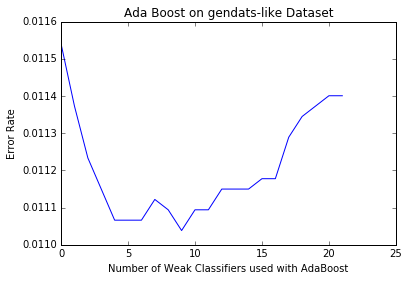

In [384]:
x = [0.0175609756097561,0.0175609756097561,0.013658536585365854,0.013658536585365854,0.00975609756097561,0.010731707317073172,0.00975609756097561,0.013658536585365854,0.012682926829268294,0.010731707317073172,0.011707317073170732,0.010731707317073172,0.011707317073170732,0.011707317073170732,0.010731707317073172,0.010731707317073172,0.007804878048780488,0.00975609756097561,0.010731707317073172,0.010731707317073172,0.011707317073170732,0.010731707317073172,0.011707317073170732,0.011707317073170732,0.012682926829268294,0.012682926829268294,0.012682926829268294,0.010731707317073172,0.010731707317073172,0.010731707317073172,0.010731707317073172,0.010731707317073172,0.010731707317073172,0.00878048780487805,0.010731707317073172,0.011707317073170732,0.012682926829268294,0.010731707317073172,0.010731707317073172,0.00975609756097561,0.010731707317073172,0.011707317073170732,0.012682926829268294,0.010731707317073172,0.012682926829268294,0.011707317073170732,0.012682926829268294,0.011707317073170732,0.011707317073170732,0.011707317073170732,0.010731707317073172,0.011707317073170732,0.011707317073170732,0.011707317073170732,0.011707317073170732,0.011707317073170732]
y = np.ma.average(x)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
y = moving_average(x,n=35)
print(y)
plt.xlabel("Number of Weak Classifiers used with AdaBoost")
plt.ylabel("Error Rate")
plt.title("Ada Boost on gendats-like Dataset")
plt.plot(y)